https://github.com/krother/machine_learning/tree/main/deep_learning/tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

In [3]:
from matplotlib import pyplot as plt

In [4]:
from tensorflow import keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout

## Goal
Recognize the type of clothing from a 28 by 28 pixel image

In [5]:
LABELS = "t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot".split()

## Get Data

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(Xtrain, ytrain), (Xtest, ytest) = load_data()

In [8]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

([], [])

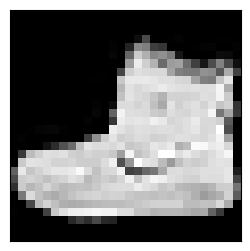

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(Xtrain[0], cmap="gray")
plt.xticks([])
plt.yticks([])

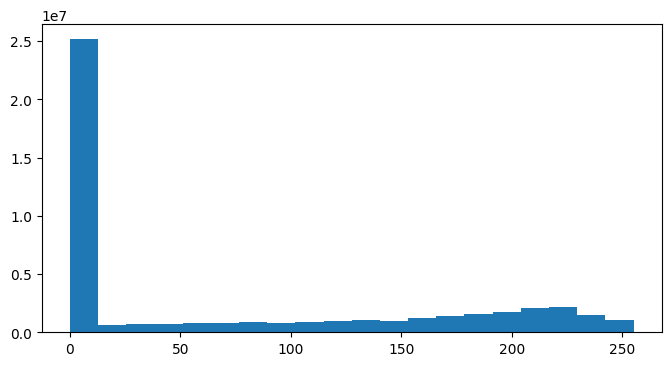

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(Xtrain.flatten(), bins=20)
None

### Preprocessing

In [30]:
X8 = Xtrain.reshape(60000, 28 * 28)[:10000]  # add more data here
Xtest8 = Xtest.reshape(10000, 28 * 28)

y = k.utils.to_categorical(ytrain[:10000])   # and here
X8.shape, y.shape

((10000, 784), (10000, 10))

In [31]:
# make normalized floats
X = X8 / 255.0
X.dtype

dtype('float64')

In [37]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
m = Sequential([
    k.Input(shape=(28 * 28,)),              # DO NOT EDIT
    Dense(units=100, activation="relu", kernel_regularizer=l2(0.01)),  # edit this; activations: 'sigmoid', 'relu', 'tanh', 'elu'?, 'leaky_relu'? 
    Dense(units=100, activation="relu", kernel_regularizer=l2(0.01)),  # edit this; activations: 'sigmoid', 'relu', 'tanh', 'elu'?, 'leaky_relu'? 
    Dense(units=10, activation="softmax"),  # DO NOT EDIT, softmax: normalizes output to sum(y) = 1.0
])
es = EarlyStopping(monitor="val_loss", patience=5)
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = m.fit(X, y, batch_size=200, epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5040 - loss: 4.0434 - val_accuracy: 0.7295 - val_loss: 2.3951
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7581 - loss: 2.1400 - val_accuracy: 0.7735 - val_loss: 1.6810
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7990 - loss: 1.5435 - val_accuracy: 0.8000 - val_loss: 1.3300
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8049 - loss: 1.2679 - val_accuracy: 0.8020 - val_loss: 1.1504
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8264 - loss: 1.0762 - val_accuracy: 0.8115 - val_loss: 1.0291
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.9864 - val_accuracy: 0.8015 - val_loss: 0.9780
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8325 - loss: 0.9069 - val_accuracy: 0.8115 - val_loss: 0.9076
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8282 - loss: 0.8569 - val_accuracy: 0.8075 - val_loss:

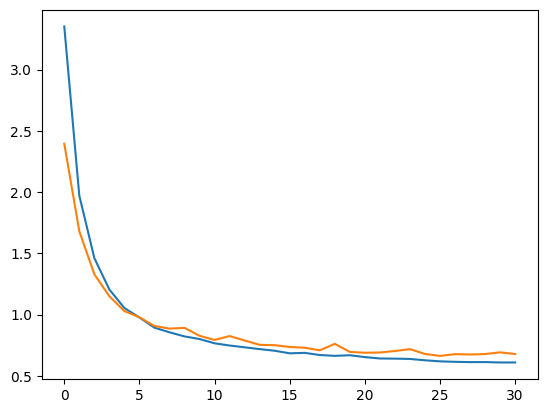

In [41]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

## Ideas for session 4:

* use a Convolutional Network (CNN)
* use data augmentation
* prediction from camera
* batch normalization & dropout
* more metrics
* automatic hyperparameter optimization(?)